# Brazilian E-Commerce Dataset by Olist

* https://www.kaggle.com/olistbr/brazilian-ecommerce

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import folium

In [2]:
'''
olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv
'''

'\nolist_customers_dataset.csv\nolist_geolocation_dataset.csv\nolist_orders_dataset.csv\nolist_order_items_dataset.csv\nolist_order_payments_dataset.csv\nolist_order_reviews_dataset.csv\nolist_products_dataset.csv\nolist_sellers_dataset.csv\nproduct_category_name_translation.csv\n'

In [3]:
raw_path='archive/'
raw_path

'archive/'

In [4]:
olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
translation=pd.read_csv(raw_path+'product_category_name_translation.csv')

In [5]:
datasets = [olist_customer, olist_geolocation, olist_orders, olist_order_items, olist_order_payments,
            olist_order_reviews, olist_products, olist_sellers]

# Data set Over view

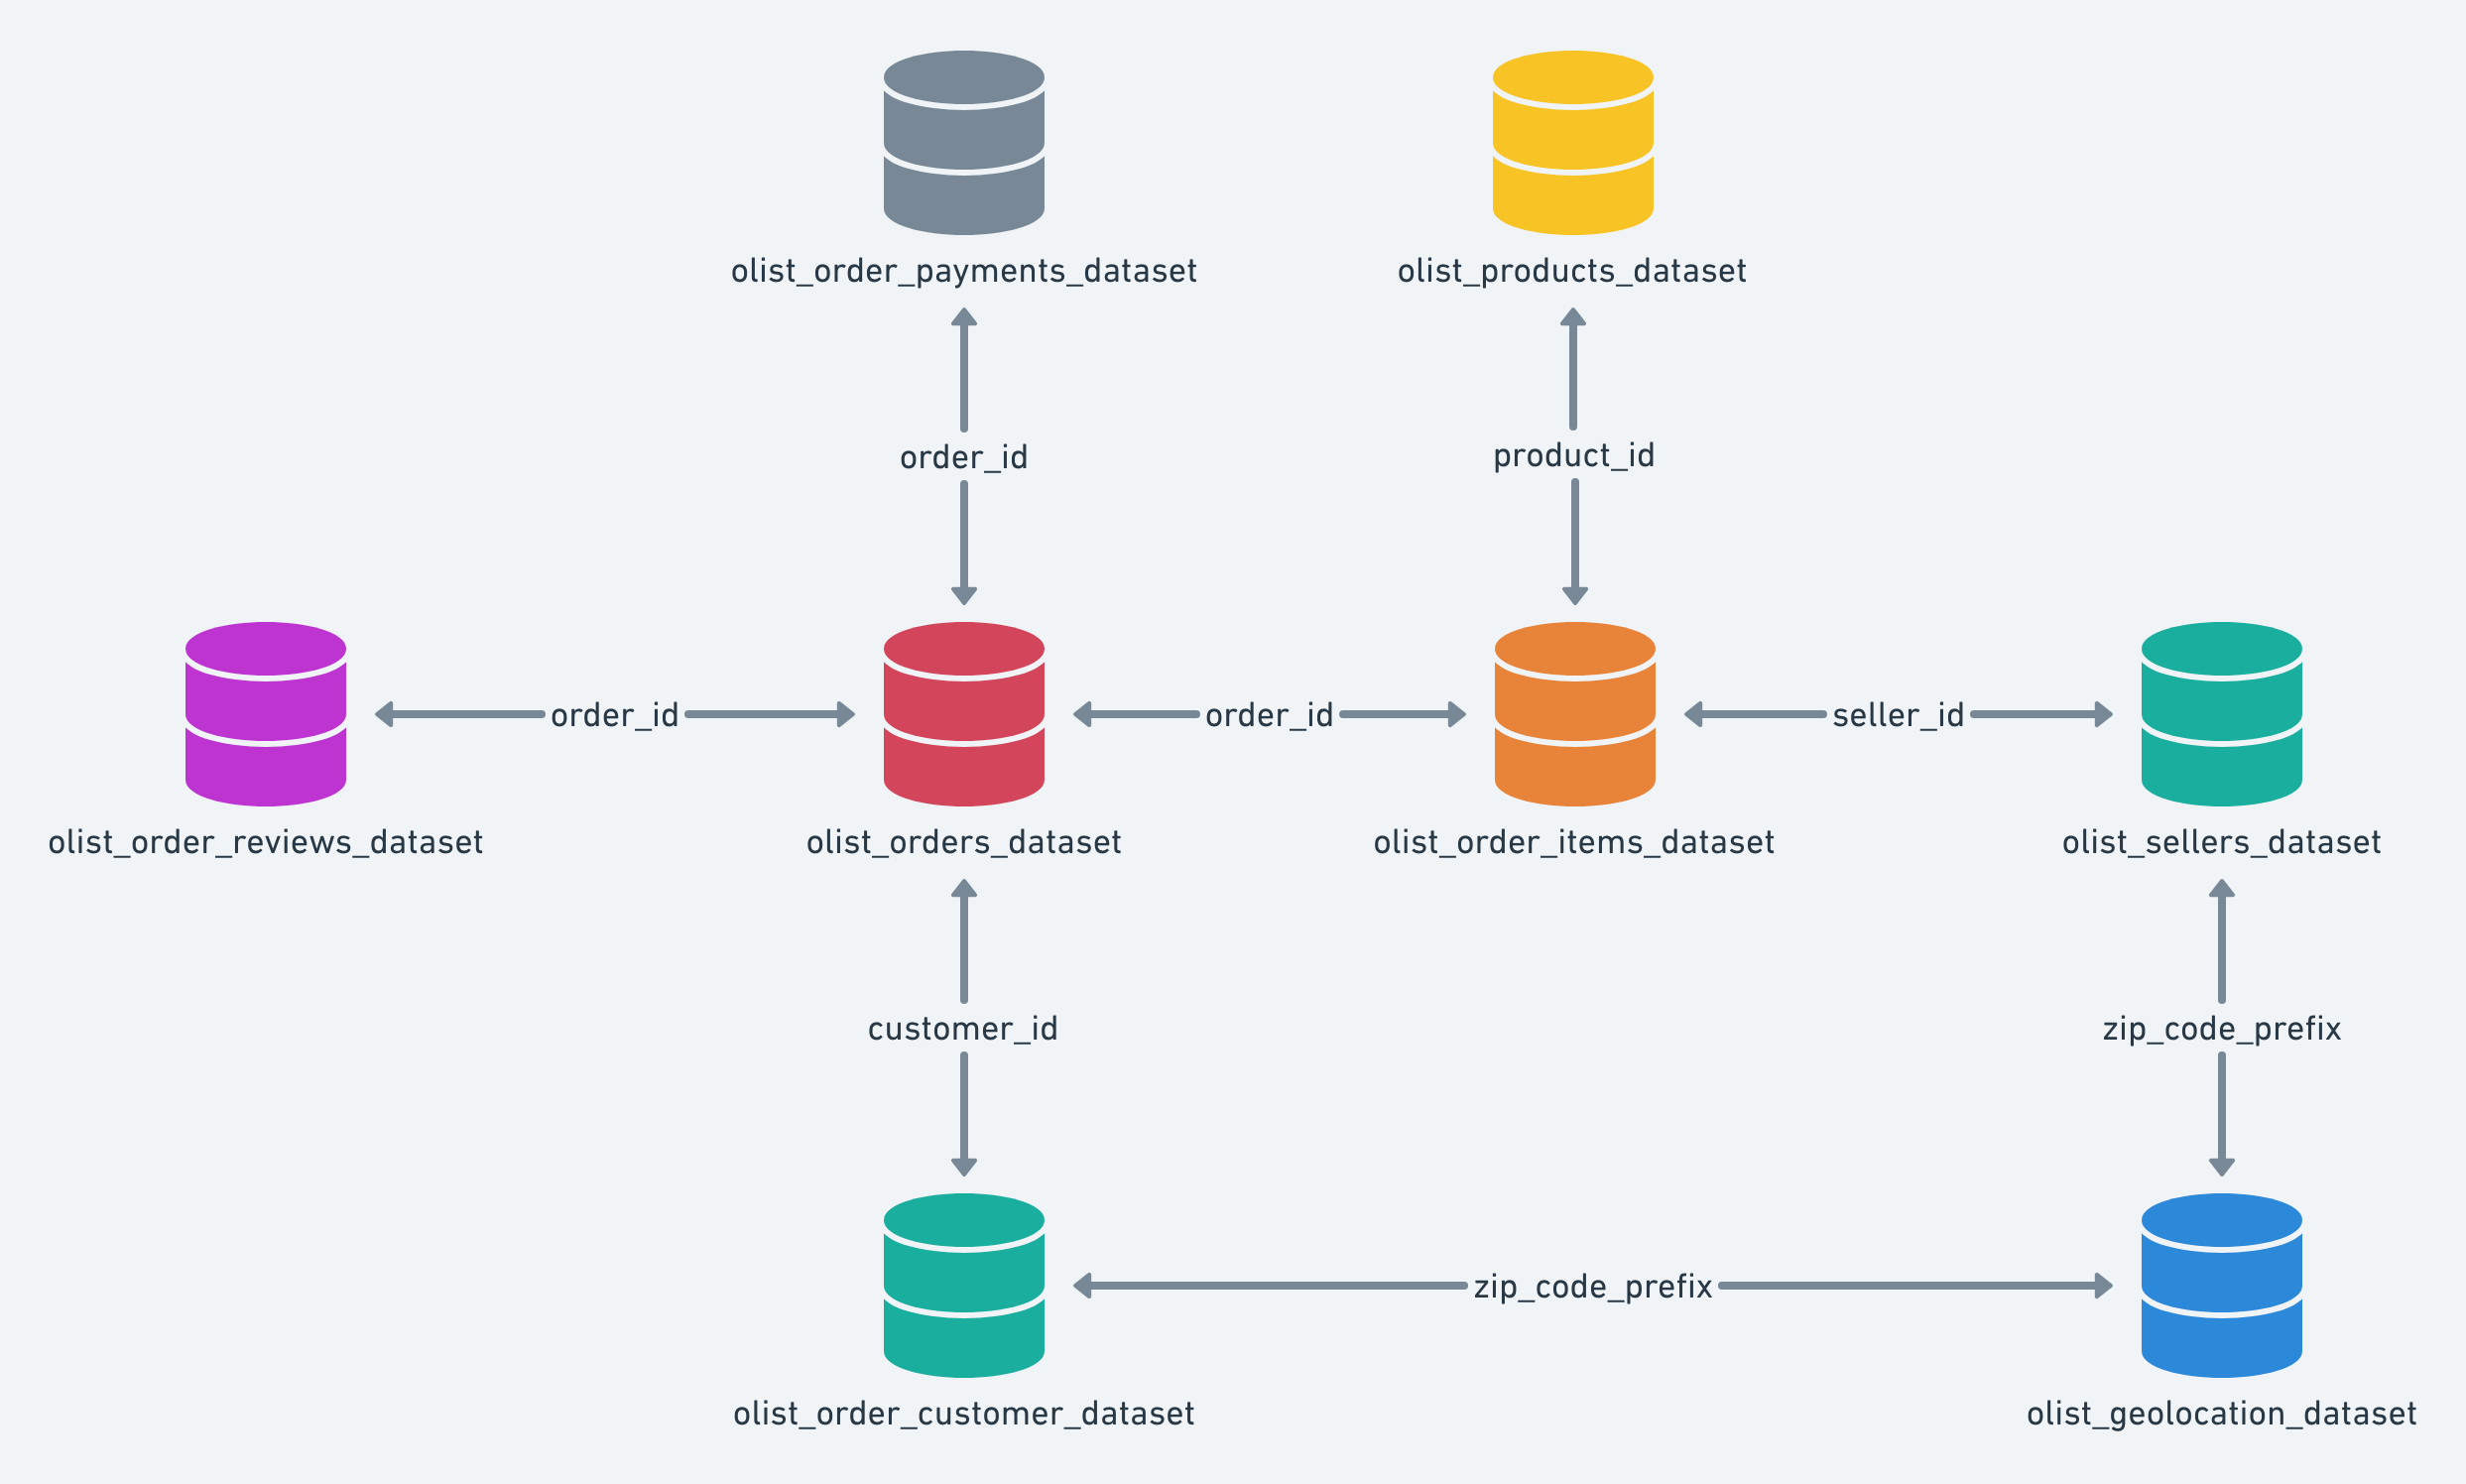

## Order Dataset
This is the core dataset. From each order you might find all other information.

* order_id : unique identifier of the order.
* customer_id : key to the customer dataset. Each order has a unique customer_id.
* order_status : Reference to the order status (delivered, shipped, etc).
* order_purchase_timestamp : Shows the purchase timestamp.
* order_approved_at : Shows the payment approval timestamp.
* order_delivered_carrier_date : Shows the order posting timestamp. When it was handled to the logistic partner.
* order_delivered_customer_date : Shows the actual order delivery date to the customer.
* order_estimated_delivery_date : Shows the estimated delivery date that was informed to customer at the purchase moment.

### info

In [6]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


* **<span style="color:red"> Time형식 변환 필요  </span>**
* **<span style="color:red"> 시간차 파생변수?
</span>**

In [8]:
#Date time 변환
for x in range(3,8):
    olist_orders.iloc[:,x]=pd.to_datetime(olist_orders.iloc[:,x],format='%Y-%m-%d %H:%M:%S')
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [9]:
olist_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
olist_orders.describe(datetime_is_numeric=True)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776567552,2017-12-31 18:35:24.098819328,2018-01-04 21:49:48.138288384,2018-01-14 12:09:19.035550464,2018-01-24 03:08:37.730113792
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [11]:
olist_orders.describe(include=np.object)

,order_id,customer_id,order_status
count,99441,99441,99441
unique,99441,99441,8
top,1ad1ca4550bd6dbd299d8538a86e5400,aaddcd6d96a67efcc7a4f5121141a518,delivered
freq,1,1,96478


### order_status

In [12]:
olist_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

<AxesSubplot:>

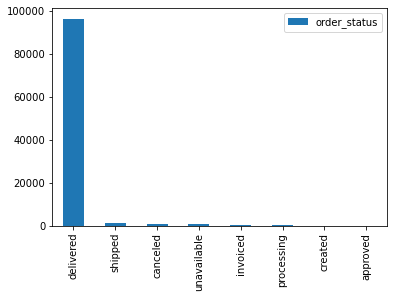

In [13]:
pd.DataFrame(olist_orders.order_status.value_counts()).plot.bar()

### order count_시계열 집계

In [54]:
# 구매 년,월 분리
olist_orders["Year"]=olist_orders.order_purchase_timestamp.dt.year
olist_orders["Month"]=olist_orders.order_purchase_timestamp.dt.month
olist_orders["weekday"]=olist_orders.order_purchase_timestamp.dt.weekday
olist_orders["hour"]=olist_orders.order_purchase_timestamp.dt.hour
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   Year                           99441 non-null  int64         
 9   Month                          99441 non-null  int64         
 10  weekday                        99441 non-null  int64         
 11  hour           

In [15]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,Month,weekday,hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,0,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,1,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,5,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,1,21


<AxesSubplot:xlabel='Year,Month'>

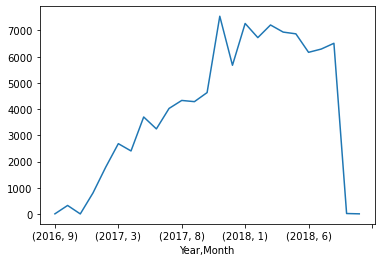

In [16]:
olist_orders.groupby(by=["Year","Month"])["order_id"].count().plot()

In [17]:
ordcnt=olist_orders.pivot_table(index=['Year',"Month"], values="order_id", aggfunc=['count'])
ordcnt

count
           order_id
Year Month         
2016 9            4
     10         324
     12           1
2017 1          800
     2         1780
     3         2682
     4         2404
     5         3700
     6         3245
     7         4026
     8         4331
     9         4285
     10        4631
     11        7544
     12        5673
2018 1         7269
     2         6728
     3         7211
     4         6939
     5         6873
     6         6167
     7         6292
     8         6512
     9           16
     10           4

In [97]:
# 이상치 제거 (2016년 9~12, 2018년 9,10월) 
ordcnt_2=ordcnt.iloc[3:-2]
ordcnt_2.columns=['orders']
# 성장률
round(ordcnt_2.pct_change()*100,2)

orders
Year Month        
2017 1         NaN
     2      122.50
     3       50.67
     4      -10.37
     5       53.91
     6      -12.30
     7       24.07
     8        7.58
     9       -1.06
     10       8.07
     11      62.90
     12     -24.80
2018 1       28.13
     2       -7.44
     3        7.18
     4       -3.77
     5       -0.95
     6      -10.27
     7        2.03
     8        3.50

Text(0.5, 1.0, '월별 주문수')

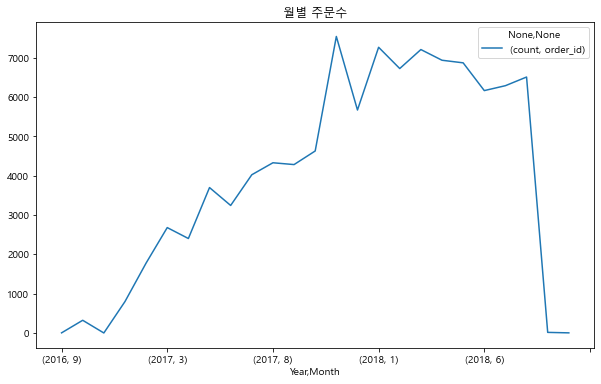

In [18]:
plt.rc("font", family="Malgun Gothic")

ordcnt.plot.line(figsize=(10,6))
plt.title("월별 주문수")

<AxesSubplot:xlabel='Year,Month'>

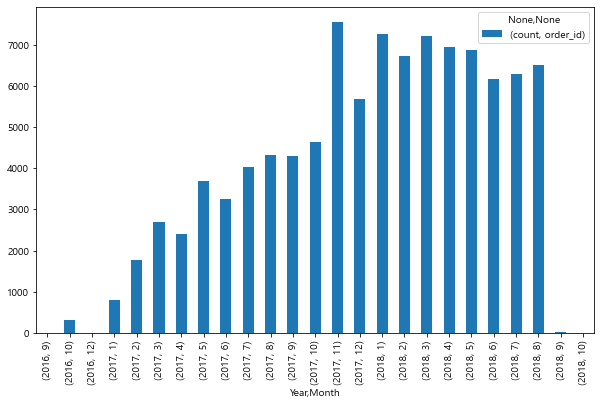

In [19]:
ordcnt.plot.bar(figsize=(10,6))

In [20]:
 # 그룹값은 Seaborn으로 어떻게 시각화할까?

## Payments Dataset
This dataset includes data about the orders payment options.  

* order_id : unique identifier of an order.
* payment_sequential : a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.
* payment_type : method of payment chosen by the customer.
* payment_installments : number of installments chosen by the customer.
* payment_value :transaction value.

### info

In [21]:
olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [22]:
olist_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [23]:
olist_order_payments.describe(include ='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


### payment sequence & type 

In [24]:
pd.DataFrame(olist_order_payments.iloc[:,1:4].value_counts())

0
payment_sequential payment_type payment_installments       
1                  credit_card  1                     25352
                   boleto       1                     19783
                   credit_card  2                     12360
                                3                     10422
                                4                      7066
...                                                     ...
                                23                        1
3                  credit_card  3                         1
28                 voucher      1                         1
27                 voucher      1                         1
29                 voucher      1                         1

[69 rows x 1 columns]

In [25]:
pd.DataFrame(olist_order_payments.iloc[:,1].value_counts()).head(7)

,payment_sequential
1,99360
2,3039
3,581
4,278
5,170
6,118
7,82


In [104]:
paymix=pd.DataFrame(olist_order_payments.iloc[:,2].value_counts())
paymix["mix"]=round(paymix.payment_type/sum(paymix.payment_type)*100,2)
paymix

,payment_type,mix
credit_card,76795,73.92
boleto,19784,19.04
voucher,5775,5.56
debit_card,1529,1.47
not_defined,3,0.00


<AxesSubplot:>

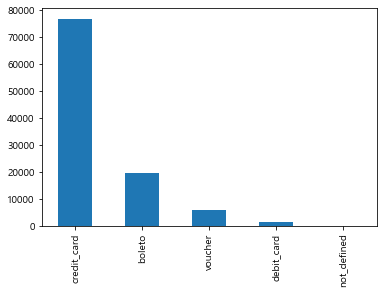

In [109]:
paymix["payment_type"].plot.bar()

<AxesSubplot:ylabel='mix'>

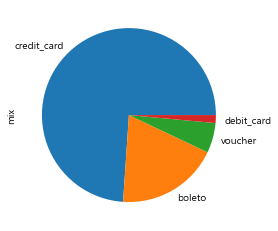

In [110]:
paymix["mix"].plot.pie()

### orderid 별 총 지급액

In [122]:
ordamt=olist_order_payments.groupby('order_id')['payment_value'].sum().to_frame()
ordamt

,payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...
fffc94f6ce00a00581880bf54a75a037,343.40
fffcd46ef2263f404302a634eb57f7eb,386.53
fffce4705a9662cd70adb13d4a31832d,116.85


### payment_amont_시계열 집계

#### order에서 필요한 값만 가져오기

In [155]:
ord=olist_orders.iloc[:,[0,1,2,3,8,9,10,11]]
ord

,order_id,customer_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,0,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,1,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,2,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017,11,5,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018,2,1,21
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017,3,3,9
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018,2,1,12
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017,8,6,14
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018,1,0,21


#### ordamt와 merge

In [197]:
ord_pym=pd.merge(ord,ordamt,how='outer',on='order_id')
ord_pym

,order_id,customer_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017,10,0,10,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018,7,1,20,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018,8,2,8,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017,11,5,19,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018,2,1,21,28.62
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017,3,3,9,85.08
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018,2,1,12,195.00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017,8,6,14,271.01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018,1,0,21,441.16


#### Null값 확인

In [200]:
ord_pym.isnull().any()

order_id                    False
customer_id                 False
order_status                False
order_purchase_timestamp    False
Year                        False
Month                       False
weekday                     False
hour                        False
payment_value                True
dtype: bool

In [205]:
ord_pym[ord_pym.payment_value.isnull()] 

,order_id,customer_id,order_status,order_purchase_timestamp,Year,Month,weekday,hour,payment_value
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016,9,3,12,NaN


#### NULL값 drop

In [207]:
ord_pym=ord_pym.dropna()
ord_pym.isnull().any()

order_id                    False
customer_id                 False
order_status                False
order_purchase_timestamp    False
Year                        False
Month                       False
weekday                     False
hour                        False
payment_value               False
dtype: bool

## Order Items Dataset
This dataset includes data about the items purchased within each order.
  
* order_id : order unique identifier
* order_item_id : sequential number identifying number of items included in the same order.
* product_id :product unique identifier
* seller_id :seller unique identifier
* shipping_limit_date :Shows the seller shipping limit date for handling the order over to the logistic partner.
* price :item price
* freight_value :item freight value item (if an order has more than one item the freight value is splitted between items)

In [28]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [29]:
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [30]:
olist_order_items["order_item_id"]=olist_order_items["order_item_id"].astype(object)
olist_order_items["shipping_limit_date"]=pd.to_datetime(olist_order_items["shipping_limit_date"])
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


In [31]:
olist_order_items.describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [32]:
olist_order_items.describe(include = np.object)

,order_id,order_item_id,product_id,seller_id
count,112650,112650,112650,112650
unique,98666,21,32951,3095
top,8272b63d03f5f79c56e9e4120aec44ef,1,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0
freq,21,98666,527,2033


## Category Name Translation

In [33]:
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Products Dataset
This dataset includes data about the products sold by Olist.

* product_id : unique product identifier
* product_category_name : root category of product, in Portuguese.
* product_name_lenght : number of characters extracted from the product name.
* product_description_lenght : number of characters extracted from the product description.
* product_photos_qty : number of product published photos
* product_weight_g : product weight measured in grams.
* product_length_cm : product length measured in centimeters.
* product_height_cm : product height measured in centimeters.
* product_width_cm : product width measured in centimeters.

In [34]:
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


* **<span style="color:red"> 영문 카테고리명 추가  </span>**

In [35]:
olist_product=pd.merge(olist_products, translation, how='left', on='product_category_name')
olist_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [36]:
olist_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [37]:
olist_product.isnull().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [38]:
olist_product.describe(include=np.object)

,product_id,product_category_name,product_category_name_english
count,32951,32341,32328
unique,32951,73,71
top,b520b78a494cbd6e36d7a1c64cdffe0b,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


In [39]:
olist_product[(olist_product.product_category_name.notnull())&
              (olist_product.product_category_name_english.isnull())]['product_category_name'].value_counts()

portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: product_category_name, dtype: int64

<AxesSubplot:>

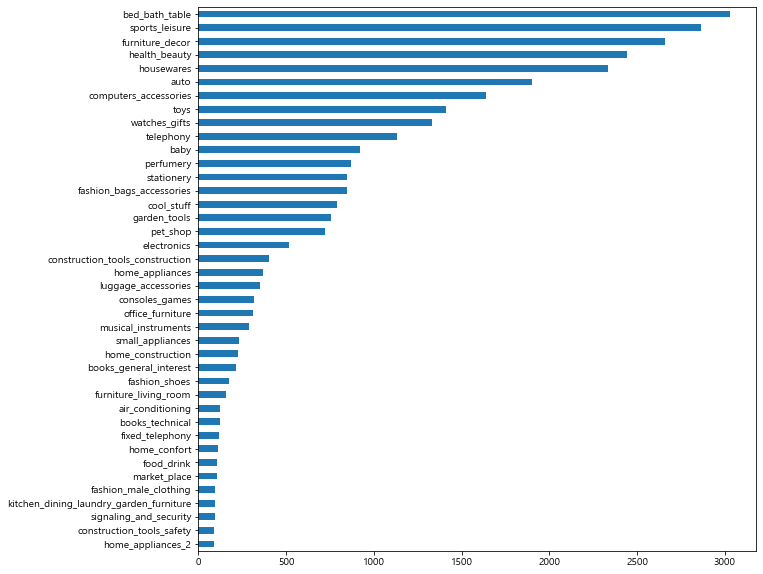

In [40]:
#category별 제품갯수
olist_product.product_category_name_english.value_counts().head(40).sort_values().plot.barh(figsize=(10,10))


<AxesSubplot:xlabel='count', ylabel='product_category_name_english'>

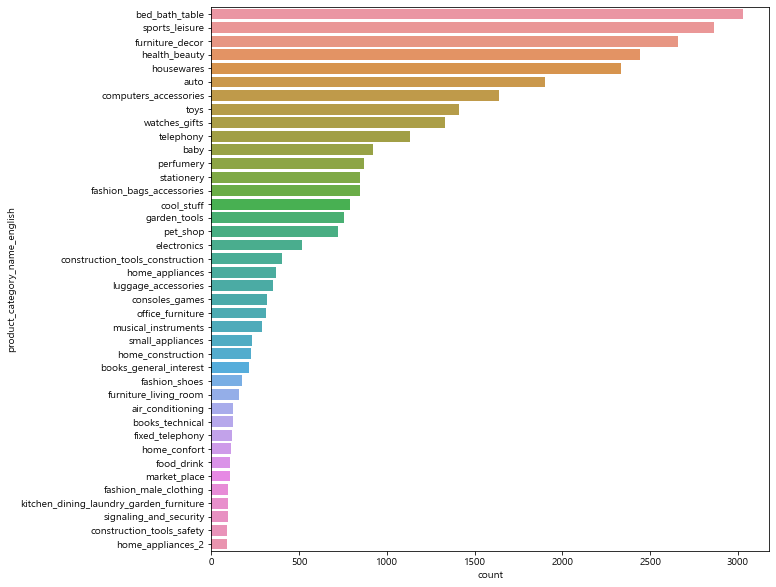

In [41]:
plt.figure(figsize=(10,10))
sns.countplot(data=olist_product,y='product_category_name_english', 
              order=olist_product.product_category_name_english.value_counts().head(40).index)

In [42]:
#category별 제품비율
prd_cnt=olist_product.product_category_name_english.value_counts().to_frame()
prd_cnt['ratio']=prd_cnt.product_category_name_english/32341*100
prd_cnt

,product_category_name_english,ratio
bed_bath_table,3029,9.365820
sports_leisure,2867,8.864908
furniture_decor,2657,8.215578
health_beauty,2444,7.556971
housewares,2335,7.219938
...,...,...
tablets_printing_image,9,0.027828
fashion_childrens_clothes,5,0.015460
home_comfort_2,5,0.015460
security_and_services,2,0.006184


In [43]:
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Sellers Dataset
This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.

* seller_id : seller unique identifier
* seller_zip_code_prefix : first 5 digits of seller zip code
* seller_city : seller city name
* seller_state : seller state

In [44]:
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [45]:
olist_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


* **<span style="color:red"> zipcode 타입 변환  </span>**

In [46]:
olist_sellers.describe(include=np.object)

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,50770d25768b0486d89be26afca3108f,sao paulo,SP
freq,1,694,1849


<AxesSubplot:>

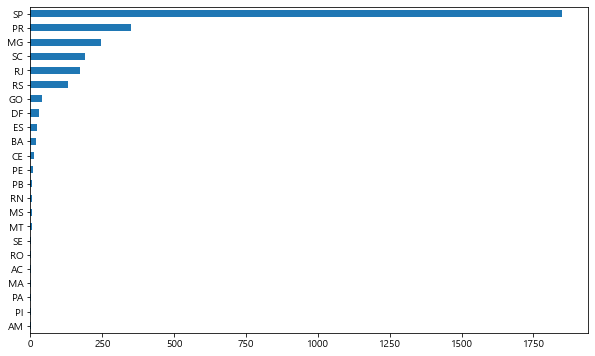

In [47]:
olist_sellers.seller_state.value_counts().sort_values().plot.barh(figsize=(10,6))


<AxesSubplot:>

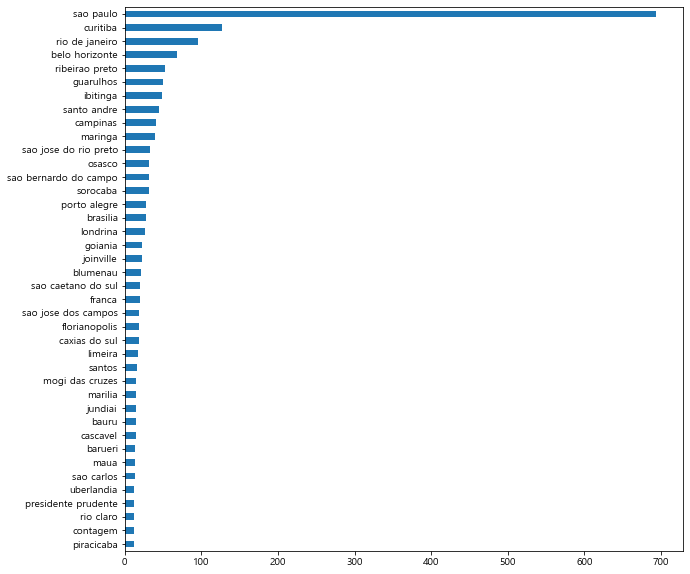

In [48]:
olist_sellers.seller_city.value_counts().head(40).sort_values().plot.barh(figsize=(10,10))

## Customers Dataset
This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.  
    
At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.
  
* customer_id : key to the orders dataset. Each order has a unique customer_id.
* customer_unique_id : unique identifier of a customer.
* customer_zip_code_prefix : first five digits of customer zip code
* customer_city: customer city name
* customer_state : customer state

In [49]:
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [50]:
olist_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [51]:
olist_customer.describe() 

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


* **<span style="color:red"> object로 바꿔야함. 전처리 필요  </span>**

In [52]:
olist_customer.describe(include=np.object)

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,aaddcd6d96a67efcc7a4f5121141a518,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [53]:
olist_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
